In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Data Task_Feb2023_TELS (1).xlsx')
data.head()

,Unique_ID,SystemName,LotteryScholType,Gender,RaceName,ACTComposite,OverallHSGPAGED,FTPTStatus,AGICategory,PellEligible,ParentEd
0,1000001,TBR Community Colleges,1_HOPE,F,"White, Not Hispanic",24.0,3.968,FT,"$96,001orAbove",0,1
1,1000002,LGI Universities,1_HOPE,F,"White, Not Hispanic",20.0,2.700,FT,"$24,001to$36,000",1,0
2,1000003,TBR Community Colleges,1_HOPE,M,Unknown,22.0,2.950,FT,"$84,001to$96,000",0,1
3,1000006,Independent Colleges & Universities,1_HOPE,M,"White, Not Hispanic",21.0,2.270,FT,"$60,001to$72,000",1,0
4,1000007,TBR Community Colleges,1_HOPE,M,Unknown,24.0,3.150,FT,"$72,001to$84,000",0,0


In [3]:
#rows and columns numbers
data.shape

(49605, 11)

In [4]:
#checking data types 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49605 entries, 0 to 49604
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unique_ID         49605 non-null  int64  
 1   SystemName        49605 non-null  object 
 2   LotteryScholType  49605 non-null  object 
 3   Gender            49605 non-null  object 
 4   RaceName          49605 non-null  object 
 5   ACTComposite      49289 non-null  float64
 6   OverallHSGPAGED   49493 non-null  float64
 7   FTPTStatus        49605 non-null  object 
 8   AGICategory       49605 non-null  object 
 9   PellEligible      49605 non-null  int64  
 10  ParentEd          49605 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.2+ MB


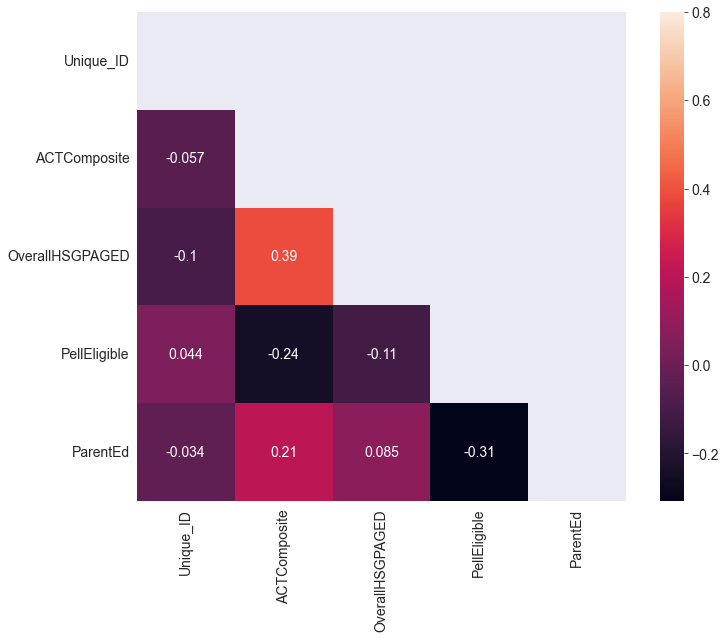

In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

#correlation of numeric data
corrdata = data.corr()
#setting fig dims
fig = plt.figure(figsize = (12, 9))
#masking the upper traingle (repetitive)
mask = np.triu(np.ones_like(corrdata, dtype=bool))
sns.heatmap(corrdata, vmax = .8,mask=mask, square = True, annot = True)
plt.show()

In [6]:
# changing GPAs > 4.0 to 4.0
data.loc[data['OverallHSGPAGED'] > 4, 'OverallHSGPAGED'] = 4.0

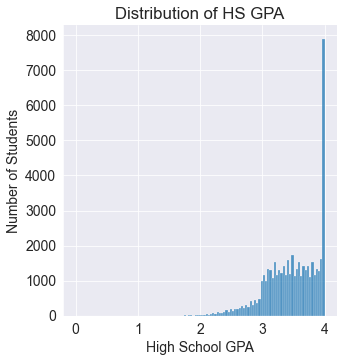

In [7]:
#distribution of GPA
a = sns.displot(data, x='OverallHSGPAGED').set(title = 'Distribution of HS GPA')
a = a.set_axis_labels('High School GPA', 'Number of Students')

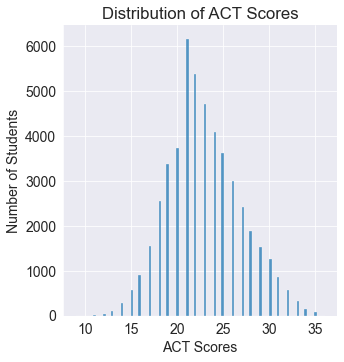

In [8]:
#distribution of ACT scores
b = sns.displot(data, x='ACTComposite').set(title = 'Distribution of ACT Scores')
b = b.set_axis_labels('ACT Scores', 'Number of Students')

In [9]:
#stats of ACT scores
mean = round(data['ACTComposite'].mean(),2)
mean1 = round(data['OverallHSGPAGED'].mean(),2)
print(f'The average score of the ACT is {mean}')
print(f'The average GPA is {mean1}')

The average score of the ACT is 22.91
The average GPA is 3.48


In [10]:
# value counts by race
data['RaceName'].value_counts()

White, Not Hispanic          38911
Black, Not Hispanic           5935
Hispanic                      1401
MultiRacial                   1187
Unknown                       1134
Asian or Pacific Islander      934
American Indian                 98
Alaskan Native                   5
Name: RaceName, dtype: int64

In [11]:
#creating new columns for scholarship calculation
data['ColType'] = data['SystemName'].copy()
yr4 = 'LGI Universities', 'Independent Colleges & Universities', 'University of Tennessee'
yr2 = 'TBR Community Colleges'
data['ColType'] = data['ColType'].replace(yr4, 4)
data['ColType'] = data['ColType'].replace(yr2, 2)
data['scholarship'] = 0

#GAMS SCHOLARSHIPS
#GAMS 4 Year FT
data['scholarship'] = np.where((data['ColType'] == 4) & (data['LotteryScholType'] == '2_GAMS') & (data['FTPTStatus'] == 'FT'), 4500, data['scholarship'])

#GAMS 4 Year PT
data['scholarship'] = np.where((data['ColType'] == 4) & (data['LotteryScholType'] == '2_GAMS') & (data['FTPTStatus'] == 'PT'), 2250, data['scholarship'])

#GAMS 2 Year FT
data['scholarship'] = np.where((data['ColType'] == 2) & (data['LotteryScholType'] == '2_GAMS') & (data['FTPTStatus'] == 'FT'), 4000, data['scholarship'])
                               
#GAMS 2 Year PT
data['scholarship'] = np.where((data['ColType'] == 2) & (data['LotteryScholType'] == '2_GAMS') & (data['FTPTStatus'] == 'PT'), 2000, data['scholarship'])



#HOPE SCHOLARSHIPS
#HOPE 4 Year FT
data['scholarship'] = np.where((data['ColType'] == 4) & (data['LotteryScholType'] == '1_HOPE') & (data['FTPTStatus'] == 'FT'), 3500, data['scholarship'])

#HOPE 4 Year PT
data['scholarship'] = np.where((data['ColType'] == 4) & (data['LotteryScholType'] == '1_HOPE') & (data['FTPTStatus'] == 'PT'), 1750, data['scholarship'])

#HOPE 2 Year FT
data['scholarship'] = np.where((data['ColType'] == 2) & (data['LotteryScholType'] == '1_HOPE') & (data['FTPTStatus'] == 'FT'), 3000, data['scholarship'])

#HOPE 2 Year PT
data['scholarship'] = np.where((data['ColType'] == 2) & (data['LotteryScholType'] == '1_HOPE') & (data['FTPTStatus'] == 'PT'), 1500, data['scholarship'])



#ASPIRE SCHOLARSHIPS
#ASPIRE 4 Year FT
data['scholarship'] = np.where((data['ColType'] == 4) & (data['LotteryScholType'] == '3_Aspire') & (data['FTPTStatus'] == 'FT'), 5000, data['scholarship'])

#ASPIRE 4 Year PT
data['scholarship'] = np.where((data['ColType'] == 4) & (data['LotteryScholType'] == '3_Aspire') & (data['FTPTStatus'] == 'PT'), 2500, data['scholarship'])

#ASPIRE 2 Year FT
data['scholarship'] = np.where((data['ColType'] == 2) & (data['LotteryScholType'] == '3_Aspire') & (data['FTPTStatus'] == 'FT'), 3500, data['scholarship'])

#ASPIRE 2 Year PT
data['scholarship'] = np.where((data['ColType'] == 2) & (data['LotteryScholType'] == '3_Aspire') & (data['FTPTStatus'] == 'PT'), 1750, data['scholarship'])


In [12]:
# eligibility base on 3 ACT scores
score1 = 21
score2 = 23
score3 = 24

#filtering by 3 scores
actdata1 = data[(data['ACTComposite'] >= score1) | (data['OverallHSGPAGED'] >= 3.00)]
actdata2 = data[(data['ACTComposite'] >= score2) | (data['OverallHSGPAGED'] >= 3.00)]
actdata3 = data[(data['ACTComposite'] >= score3) | (data['OverallHSGPAGED'] >= 3.00)]

#number of eligibile students
el1 = len(actdata1)
el2 = len(actdata2)
el3 = len(actdata3)


print(f'The number of eligible student for ACT scores of {score1} or greater is {el1}')
print(f'The number of eligible student for ACT scores of {score2} or greater is {el2}')
print(f'The number of eligible student for ACT scores of {score3} or greater is {el3}')
print('------------------------------------------------------------------------------')
print(f'Increasing the scholarship from {score1} to {score2} results in a decrease of {1 - (el2/el1):.2%} of scholarship eligibility')
print(f'Increasing the scholarship from {score1} to {score3} results in a decrease of {1 - (el3/el1):.2%} of scholarship eligibility')

The number of eligible student for ACT scores of 21 or greater is 49187
The number of eligible student for ACT scores of 23 or greater is 46467
The number of eligible student for ACT scores of 24 or greater is 45740
------------------------------------------------------------------------------
Increasing the scholarship from 21 to 23 results in a decrease of 5.53% of scholarship eligibility
Increasing the scholarship from 21 to 24 results in a decrease of 7.01% of scholarship eligibility


In [13]:
#number of ineligible students
notel = data[(data['ACTComposite'] < score1) & (data['OverallHSGPAGED'] < 3.00)]
len(notel)

335

In [14]:
#Total scholarships offered by ACT Scores
totschol21 = actdata1['scholarship'].sum()
totschol23 = actdata2['scholarship'].sum()
totschol24 = actdata3['scholarship'].sum()

print(f'Total Scholarship Awards for ACT scores of {score1} is ${totschol21:,}')
print(f'Total Scholarship Awards for ACT scores of {score2} is ${totschol23:,}')
print(f'Total Scholarship Awards for ACT scores of {score3} is ${totschol24:,}')

Total Scholarship Awards for ACT scores of 21 is $186,499,250
Total Scholarship Awards for ACT scores of 23 is $176,425,250
Total Scholarship Awards for ACT scores of 24 is $173,735,250


In [15]:
#Savings amount by scholarship
savings23 = totschol21 - totschol23
savings24 = totschol21 - totschol24

print(f' The total savings of changing the ACT from a {score1} to a {score2} is ${savings23:,}')
print(f' The total savings of changing the ACT from a {score1} to a {score3} is ${savings24:,}')

 The total savings of changing the ACT from a 21 to a 23 is $10,074,000
 The total savings of changing the ACT from a 21 to a 24 is $12,764,000


In [16]:
#saving percentage by scholarship
savings23per = round((savings23/totschol21) *100,2)
savings24per = round((savings24/totschol21) *100,2)



print(f' The total savings of changing the ACT from a {score1} to a {score2} is {savings23per:,}%')
print(f' The total savings of changing the ACT from a {score1} to a {score3} is {savings24per:,}%')

 The total savings of changing the ACT from a 21 to a 23 is 5.4%
 The total savings of changing the ACT from a 21 to a 24 is 6.84%


In [17]:
# Scholarship type by ACT scores

schol1 = actdata1.groupby(['LotteryScholType'])['scholarship'].sum().reset_index()
schol1 = schol1.rename(columns = {'scholarship' : 'scholarship' + str(score1)})

schol2 = actdata2.groupby(['LotteryScholType'])['scholarship'].sum().reset_index()
schol2 = schol2.rename(columns = {'scholarship' : 'scholarship' + str(score2)})

schol3 = actdata3.groupby(['LotteryScholType'])['scholarship'].sum().reset_index()
schol3 = schol3.rename(columns = {'scholarship' : 'scholarship' + str(score3)})

final = schol1.merge(schol2, how='left', on = 'LotteryScholType')
final = final.merge(schol3, how='left', on = 'LotteryScholType')

styles = final.copy()
styles = styles.style.format({'scholarship21' : '{:,}', 'scholarship23' : '{:,}', 'scholarship24' : '{:,}'})
final

,LotteryScholType,scholarship21,scholarship23,scholarship24
0,1_HOPE,104685750,98975000,97376500
1,2_GAMS,14292000,14292000,14292000
2,3_Aspire,67521500,63158250,62066750


In [18]:
#manipulating final df for data visualization
final = final.transpose()
final.columns = final.iloc[0]
final = final.iloc[1:]
final = final.reset_index()
final

LotteryScholType,index,1_HOPE,2_GAMS,3_Aspire
0,scholarship21,104685750,14292000,67521500
1,scholarship23,98975000,14292000,63158250
2,scholarship24,97376500,14292000,62066750


(array([0, 1, 2]), [Text(0, 0, '21'), Text(1, 0, '23'), Text(2, 0, '24')])

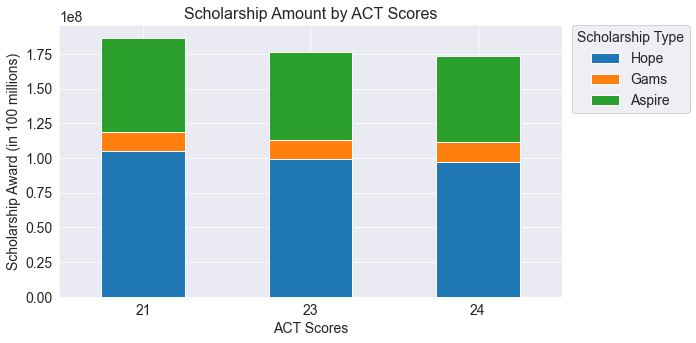

In [19]:
#visualization of scholarship amounts
ax =final.set_index('index').plot(kind='bar', stacked=True)

#overall title
plt.title('Scholarship Amount by ACT Scores', fontsize=16)

# add axis titles
plt.xlabel('ACT Scores')
plt.ylabel('Scholarship Award (in 100 millions)')

#legend
plt.legend(['Hope','Gams','Aspire'],title='Scholarship Type', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#changing column labels
ax.set_xticklabels(['21','23','24'])

#rotate axis
plt.xticks(rotation=0)

In [20]:
#creating a function to evaluate normalized value counts of each column
def breakdown(col):
    
    a = actdata1[col].value_counts(normalize=True).reset_index()
    a = a.rename(columns = {col : col + str(score1)})
    
    b = actdata2[col].value_counts(normalize=True).reset_index()
    b = b.rename(columns = {col : col + str(score2)})
    
    c = actdata3[col].value_counts(normalize=True).reset_index()
    c = c.rename(columns = {col : col + str(score3)})
    
    final = a.merge(b, how = 'left', on='index')
    final = final.merge(c, how = 'left', on='index')
    return(final)

In [21]:
#applying function by to each column 
a = {}
for i in data.columns:
    a[i] = breakdown(i)

In [22]:
#normalized breakdown of systemname by ACT scores
system = a['SystemName']
system['per_diff (24-21)'] = system['SystemName24'] - system['SystemName21']
system = system.set_index('index')
system = system.mul(100).round(2).astype(str).add('%')
system = system.reset_index()
system

,index,SystemName21,SystemName23,SystemName24,per_diff (24-21)
0,LGI Universities,33.59%,33.24%,33.14%,-0.45%
1,University of Tennessee,27.8%,28.44%,28.59%,0.79%
2,TBR Community Colleges,22.67%,22.07%,21.97%,-0.71%
3,Independent Colleges & Universities,15.93%,16.25%,16.31%,0.37%


In [23]:
#normalized breakdown of lotteryschool type by ACT scores
schooltype = a['LotteryScholType'] 
schooltype['per_diff (24-21)'] = schooltype['LotteryScholType24'] - schooltype['LotteryScholType21'] 
schooltype = schooltype.set_index('index')
schooltype = schooltype.mul(100).round(2).astype(str).add('%')
schooltype = schooltype.reset_index()
schooltype

,index,LotteryScholType21,LotteryScholType23,LotteryScholType24,per_diff (24-21)
0,1_HOPE,63.5%,63.47%,63.43%,-0.07%
1,3_Aspire,30.01%,29.67%,29.6%,-0.41%
2,2_GAMS,6.49%,6.87%,6.97%,0.49%


In [24]:
#normalized breakdown of gender by ACT scores
gender = a['Gender']
gender['per_diff (24-21)'] = gender['Gender24'] - gender['Gender21']
gender = gender.set_index('index')
gender = gender.mul(100).round(2).astype(str).add('%')
gender = gender.reset_index()
gender

,index,Gender21,Gender23,Gender24,per_diff (24-21)
0,F,56.58%,57.65%,58.03%,1.45%
1,M,43.42%,42.35%,41.97%,-1.45%


In [25]:
#manipulating for visualization
gender1 = gender.copy()
gender1 = gender1.rename(columns={'Gender21': 21, 'Gender23':23, 'Gender24':24})
gender1 = gender1.drop(['per_diff (24-21)'], axis=1) 
gender1 = gender1.melt(id_vars='index', value_name='Distribution %', var_name='ACT Score')
gender1['ACT Score'] = pd.to_numeric(gender1['ACT Score'])
gender1['Distribution %'] = gender1['Distribution %'].str.strip('%')
gender1['Distribution %'] = pd.to_numeric(gender1['Distribution %'])
gender1

,index,ACT Score,Distribution %
0,F,21,56.58
1,M,21,43.42
2,F,23,57.65
3,M,23,42.35
4,F,24,58.03
5,M,24,41.97


Text(0.5, 0, 'Gender')

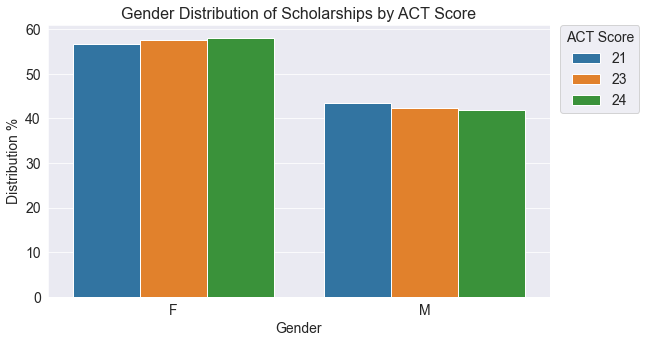

In [26]:
#gender distribution percentage visualization by ACT score
ax = sns.barplot(data=gender1, x='index', y = 'Distribution %', hue='ACT Score')

#overall title
plt.title('Gender Distribution of Scholarships by ACT Score', fontsize=16)

#moving legend
plt.legend(title = 'ACT Score', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

#changing label
plt.xlabel('Gender')

/home/chase/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/chase/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


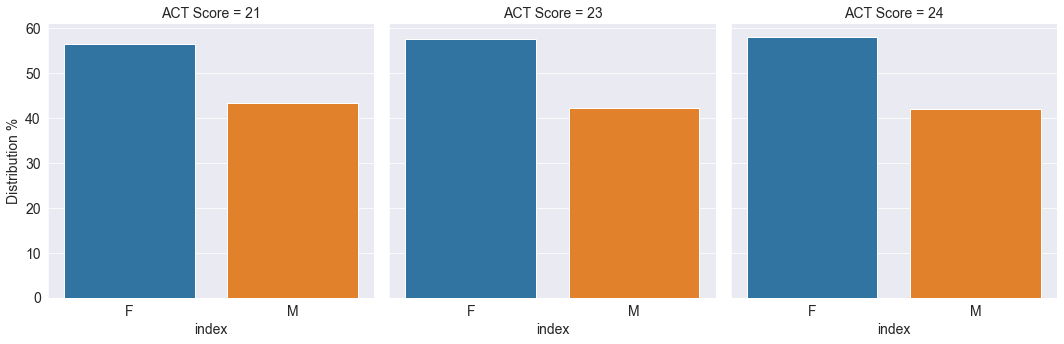

In [27]:
b = sns.factorplot('index', 'Distribution %', col='ACT Score', data=gender1, kind='bar')

In [28]:
#normalized breakdown of race by ACT scores
race = a['RaceName']
race['per_diff (24-21)'] = race['RaceName24'] - race['RaceName21']
race = race.set_index('index')
race = race.mul(100).round(2).astype(str).add('%')
race = race.reset_index()
race

,index,RaceName21,RaceName23,RaceName24,per_diff (24-21)
0,"White, Not Hispanic",78.62%,78.9%,78.9%,0.28%
1,"Black, Not Hispanic",11.79%,11.56%,11.55%,-0.24%
2,Hispanic,2.83%,2.81%,2.81%,-0.02%
3,MultiRacial,2.38%,2.32%,2.3%,-0.08%
4,Unknown,2.28%,2.29%,2.3%,0.01%
5,Asian or Pacific Islander,1.88%,1.92%,1.93%,0.05%
6,American Indian,0.2%,0.19%,0.19%,-0.0%
7,Alaskan Native,0.01%,0.01%,0.01%,0.0%


In [29]:
#normalized breakdown of FT-PT status by ACT scores
status = a['FTPTStatus']
status['per_diff (24-21)'] = status['FTPTStatus24'] - status['FTPTStatus21']
status = status.set_index('index')
status = status.mul(100).round(2).astype(str).add('%')
status = status.reset_index()
status

,index,FTPTStatus21,FTPTStatus23,FTPTStatus24,per_diff (24-21)
0,FT,97.99%,98.07%,98.08%,0.1%
1,PT,2.01%,1.93%,1.92%,-0.1%


In [30]:
#normalized by family income by ACT scores
income = a['AGICategory'] 
income['per_diff (24-21)'] = income['AGICategory24'] - income['AGICategory21']
income = income.set_index('index')
income = income.mul(100).round(2).astype(str).add('%')
income = income.reset_index()
income

,index,AGICategory21,AGICategory23,AGICategory24,per_diff (24-21)
0,"$96,001orAbove",28.83%,29.1%,29.17%,0.34%
1,"$12,001to$24,000",10.21%,10.11%,10.12%,-0.09%
2,"$24,001to$36,000",9.99%,9.88%,9.88%,-0.11%
3,"$36,001to$48,000",8.68%,8.64%,8.64%,-0.04%
4,"$48,001to$60,000",8.21%,8.2%,8.2%,-0.01%
5,"$60,001to$72,000",8.05%,8.12%,8.11%,0.06%
6,"$72,001to$84,000",7.7%,7.72%,7.71%,0.02%
7,"$84,001to$96,000",7.15%,7.2%,7.22%,0.08%
8,"$12,000orLess",6.07%,6.02%,5.97%,-0.09%
9,Unknown,5.13%,5.02%,4.98%,-0.16%


In [31]:
#normalized by Pell Eligibility by ACT scores
pell = a['PellEligible'] 
pell['per_diff (24-21)'] = pell['PellEligible24'] - pell['PellEligible21']
pell = pell.set_index('index')
pell = pell.mul(100).round(2).astype(str).add('%')
pell = pell.reset_index()
pell

,index,PellEligible21,PellEligible23,PellEligible24,per_diff (24-21)
0,0,55.6%,56.01%,56.07%,0.47%
1,1,44.4%,43.99%,43.93%,-0.47%


In [32]:
#normalized by Parent Education by ACT scores
pared = a['ParentEd']
pared['per_diff (24-21)'] = pared['ParentEd24'] - pared['ParentEd21'] 
pared = pared.set_index('index')
pared = pared.mul(100).round(2).astype(str).add('%')
pared = pared.reset_index()
pared

,index,ParentEd21,ParentEd23,ParentEd24,per_diff (24-21)
0,1,64.26%,64.4%,64.42%,0.16%
1,0,35.74%,35.6%,35.58%,-0.16%
